## Contents
- [1. Introduction](#1.-Introduction)
- [2. Imports](#2.-Imports)
- [3. ID Cards](#3.-ID-Cards)
- [4. Passports](#4.-Passports)

---
### 1. Introduction
---
To conduct an EDA of the augmented training dataset, to understand the distributions of (a) the location, (b) the area and (c) the aspect ratios of the true bounding boxes. The augmented training dataset is made up of:

- 600 augmented photos:
    - 300 digitally generated photos of ID cards from Slovakia, Spain and Finland each (total 300)
    - 300 digitally generated photos of passports from Latvia, Russia and Greece each (total 300)
        - All augmented with:
            - Crop: 0% minimum zoom, 50% maximum zoom
            - Left-right flip: applied
            - Mosaic: applied
<br>
<br>
- all photos are of 640 x 640 pixels (resized to fit YOLO's input format)



---
### 2. Imports
---

In [1]:
import pandas as pd
import os, glob
import matplotlib.pyplot as plt

os.chdir('F:/content/datasets/id-card-passport-detection-20/train') # change directory

In [2]:
# Define relative path to folder containing the text files
files_folder = "labels/"
files = []

# Create a dataframe list by using a list comprehension
files = [pd.read_csv(file, delimiter=" ", names =["class", "center_x", "center_y", "width", "height"] ) for file in glob.glob(os.path.join(files_folder ,"*.txt"))]

# Concatenate the list of DataFrames into one
files_df = pd.concat(files)

In [3]:
# find the area of the bounding boxes in pixels
files_df = files_df.reset_index(drop=True)
files_df['area'] = files_df['width'] * 640 * files_df['height'] * 640
files_df['aspect_ratio'] = files_df['width'] / files_df['height']
files_df.head()

,class,center_x,center_y,width,height,area,aspect_ratio
0,0,0.254688,0.184375,0.509375,0.262500,54768.0,1.940476
1,1,0.754687,0.301563,0.490625,0.368750,74104.0,1.330508
2,1,0.254688,0.692969,0.509375,0.285938,59658.0,1.781421
3,1,0.754687,0.671094,0.490625,0.242188,48670.0,2.025806
4,0,0.264844,0.081250,0.370312,0.162500,24648.0,2.278846


---
### 3. ID Cards
---

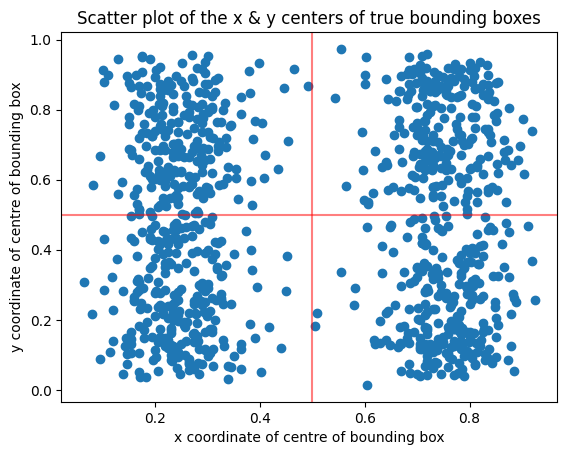

In [4]:
id_df = files_df[files_df['class'] == 0]

# scatter plot the center_x and center_y
plt.scatter(id_df['center_x'], id_df['center_y'])
plt.axhline(y = 0.5, color = 'r', linestyle = '-', alpha=0.5)
plt.axvline(x = 0.5, color = 'r', linestyle = '-', alpha=0.5)
plt.xlabel('x coordinate of centre of bounding box')
plt.ylabel('y coordinate of centre of bounding box')
plt.title('Scatter plot of the x & y centers of true bounding boxes')
plt.show()

Scatter plot analysis:
- better distribution across the entire photo (due to the mosaic effect applied). The mosaic effect should have a positive effect on model performance due to the introduction of cropped objects, multiple classes and objects within a photo.

(array([ 44., 174., 212., 216., 155.,  83.,  45.,  16.,   9.,   2.]),
 array([  4410. ,  16911.1,  29412.2,  41913.3,  54414.4,  66915.5,
         79416.6,  91917.7, 104418.8, 116919.9, 129421. ]),
 <BarContainer object of 10 artists>)

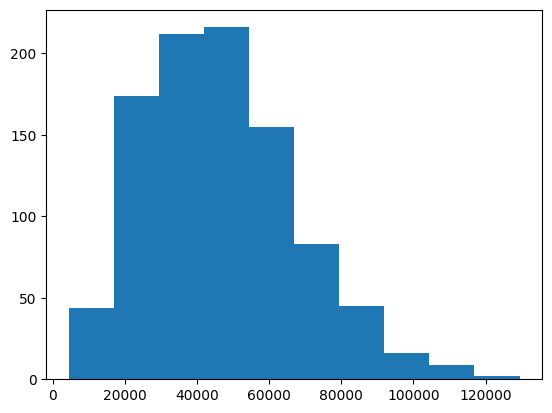

In [5]:
# histogram of area
plt.hist(id_df['area'])

Area histogram analysis:
- most training samples hover between an area of 30,000 - 60,000 pixels
- a cropping effect of up to +50% is applied during the augmentation, which should improve the model's capability to identify zoomed-in ID cards

(array([381., 448.,  83.,  27.,  11.,   4.,   1.,   0.,   0.,   1.]),
 array([ 0.34070796,  1.66774828,  2.99478859,  4.32182891,  5.64886922,
         6.97590954,  8.30294985,  9.62999017, 10.95703048, 12.2840708 ,
        13.61111111]),
 <BarContainer object of 10 artists>)

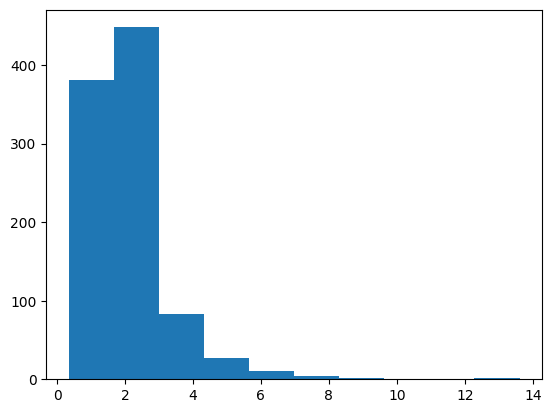

In [6]:
# histogram of aspect ratio
plt.hist(id_df['aspect_ratio'])

Aspect ratio histogram analysis:
- due to the crop and mosaic effects, the aspect ratio range increased from the default training dataset (2.5 - 3.0) to a range of 0.5 - 2.0 (the standard aspect ratio of an ID card is 2.6). This should help the model better identify ID cards (by sometimes showing it parts of a card, instead of only showing a full card)

---
### 4. Passports
---

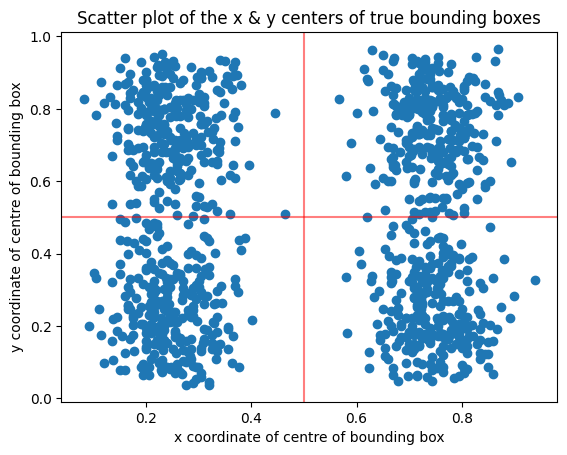

In [7]:
pass_df = files_df[files_df['class'] == 1]

# scatter plot the center_x and center_y
plt.scatter(pass_df['center_x'], pass_df['center_y'])
plt.axhline(y = 0.5, color = 'r', linestyle = '-', alpha=0.5)
plt.axvline(x = 0.5, color = 'r', linestyle = '-', alpha=0.5)
plt.xlabel('x coordinate of centre of bounding box')
plt.ylabel('y coordinate of centre of bounding box')
plt.title('Scatter plot of the x & y centers of true bounding boxes')
plt.show()

Scatter plot analysis:
- similar to the ID card samples, better passport sample distribution around the entire photo (due to the mosaic effect applied). The mosaic effect should have a positive effect on model performance due to the introduction of cropped objects, multiple classes and objects within a photo.

(array([ 37., 118., 187., 204., 197., 182.,  94.,  33.,  24.,   9.]),
 array([  7348. ,  19999.1,  32650.2,  45301.3,  57952.4,  70603.5,
         83254.6,  95905.7, 108556.8, 121207.9, 133859. ]),
 <BarContainer object of 10 artists>)

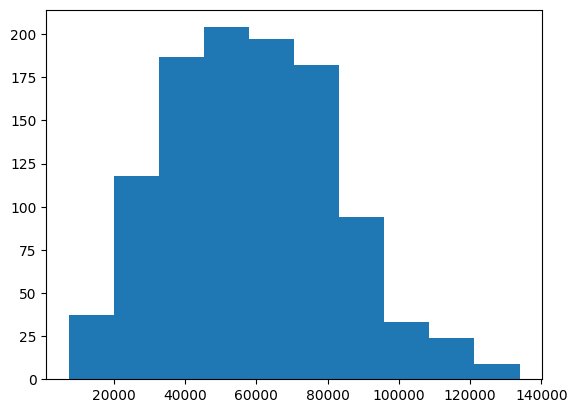

In [8]:
# histogram of area
plt.hist(pass_df['area'])

Area histogram analysis:
- most training samples hover between an area of 30,000 - 80,000 pixels (also due to the mosaic effect)
- a cropping effect of up to +50% is applied during the augmentation, which should improve the model's capability to identify zoomed-in ID cards

(array([327., 500., 161.,  54.,  26.,   6.,   4.,   5.,   1.,   1.]),
 array([0.39795918, 1.3255102 , 2.25306122, 3.18061224, 4.10816327,
        5.03571429, 5.96326531, 6.89081633, 7.81836735, 8.74591837,
        9.67346939]),
 <BarContainer object of 10 artists>)

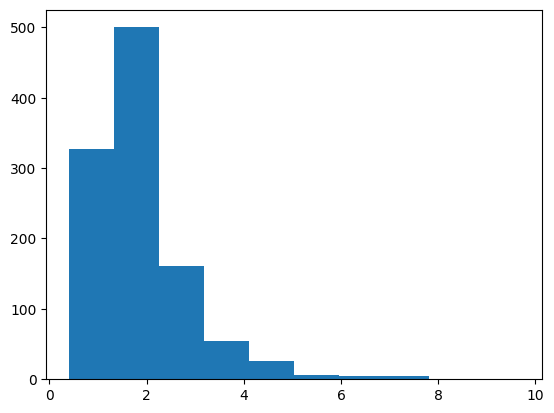

In [9]:
# histogram of aspect ratio
plt.hist(pass_df['aspect_ratio'])

Aspect ratio histogram analysis:
- due to the crop and mosaic effects, the aspect ratio range increased from the default training dataset (2.5 - 3.0) to a range of 0.5 - 2.0 (the standard aspect ratio of an ID card is 2.6). This should help the model better identify passports (by sometimes showing it parts of a passport, instead of only showing a full passport)